# Linear Regression Example

使用TensorFlow实现线性回归.



导包

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 随机数
rng = np.random

定义训练次数learning_epochs，卷曲神经的学习率learning_rate  
显示打印数据的步幅display_step

In [2]:
# 参数
learning_rate = 0.01
#学习1000次
training_epochs = 1000
display_step = 50

生成训练数据

In [3]:
train_X = np.linspace(0,10,num= 20)+np.random.randn(20)
train_Y = np.linspace(1,4,num = 20)+np.random.randn(20)
n_samples = 20

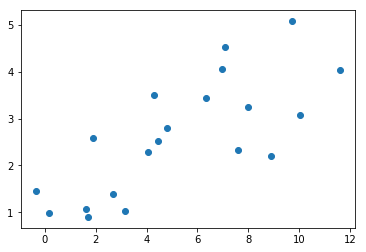

In [4]:
plt.scatter(train_X,train_Y)

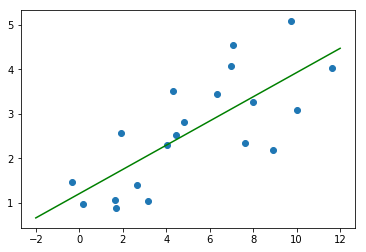

In [5]:
#使用之前的线性回归，将数据进行训练和学习

from sklearn.linear_model import LinearRegression

lrg = LinearRegression()

#训练数据
lrg.fit(train_X.reshape((20,1)),train_Y)

#声明预测数据
x_test = np.linspace(-2,12,num = 100).reshape((100,1))
#预测
y_ = lrg.predict(x_test)
plt.scatter(train_X,train_Y)

#输出预测结果
plt.plot(x_test,y_,c = 'green')

In [7]:
print(lrg.coef_,lrg.intercept_)

[ 0.27245924] 1.20407653204


In [ ]:
f(x) = w*x + b

定义TensorFlow参数：X，Y，W，b

In [15]:
# tf Graph Input
#占位符，此时X，Y并没有赋值，训练的时候进行赋值
#通过feed这种方式进行赋值
#未知数据
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
#Variable变量，定义了，斜率和截距，成功求解
#weight，权重，x*weight = y
#斜率就是 weight
#Variable变量
# W ，b一开始蒙了一个数据
W= tf.Variable(rng.randn())
#b截距，bias 有偏差，就相当于有截距
b = tf.Variable(rng.randn())

创建线性模型

In [16]:
# Construct a linear model
#f(x) = w*x + b
#预测值，train_Y原本的值
#并不是真实的，需要使用TensorFlow 进行学习，尽心处理
#函数f(x)
# 预测函数
y_pred = tf.add(tf.multiply(X, W), b)

创建TensorFlow均方误差cost  
以及梯度下降优化器optimizer

In [27]:
# 均方误差，平均误差
#cost越小，数据越精确
# 损失函数，y_pred 预测函数（f(x) = w*x + b）
# Y 真实的数据，y值，创造20个点，
# (Y - y_pred)^2/样本量   平均最小二乘法
# cost越小，说明预测函数越精确---->w,b---->答案
cost = tf.reduce_mean(tf.pow(y_pred-Y, 2))

#算法
# 实现梯度下降算法的优化器
#learning_rate = 0.01
#minimize:最小化 进行梯度下降的条件
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

TensorFlow进行初始化

In [20]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.715032935 W= 0.342179 b= 0.904533
Epoch: 0100 cost= 0.715183139 W= 0.342565 b= 0.898903
Epoch: 0150 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0200 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0250 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0300 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0350 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0400 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0450 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0500 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0550 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0600 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0650 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0700 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0750 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0800 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0850 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0900 cost= 0.715184867 W= 0.342568 b= 0.898851
Epoch: 0950 cost= 0.71518486

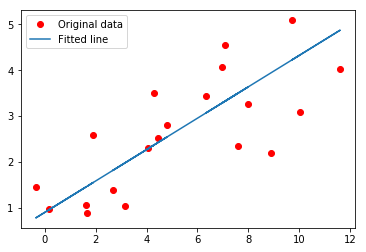

In [28]:
# 训练开始
with tf.Session() as sess:
    #初始化
    sess.run(init)

    #学习了20000 次
    # 训练所有数据 1000次for循环
    for epoch in range(training_epochs):
        #执行20次
        #TensorFlow可以连续学习
        for (x, y) in zip(train_X, train_Y):
            #每次for循环执行了梯度下降的算法
#             条件cost值最小
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #每执行50次显示运算结果
        if (epoch+1)%50 == 0:
            #cost 最小二乘法平方差之和的平局值
#             cost = tf.reduce_sum(tf.pow(y_pred-Y, 2))/n_samples
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
#           f(x) = w*x + b---->w:weight;  b: bias(偏差)
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),
                  "W=", sess.run(W), "b=", sess.run(b))

    #算法优化结束
    print("Optimization Finished!")
    
    #平均偏差，最终结果
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #数据可视化
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    #f(x) = w*x + b
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()

In [24]:
print(lrg.coef_,lrg.intercept_)

[ 0.27245924] 1.20407653204
